In [1]:
# Import all dependencies
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read stats history csv file from locust export folder
stats_history_df = pd.read_csv('./stats/sample_stats_history.csv', sep=",")

In [5]:
# Remove useless row

stats_history_df = stats_history_df[stats_history_df.Name != "Aggregated"]

In [6]:
# timestamp to datetime
stats_history_df["datetime"] = stats_history_df["Timestamp"].apply(lambda t: datetime.fromtimestamp(t))

In [7]:
stats_history_df


,Timestamp,User Count,Type,Name,Requests/s,Failures/s,50%,66%,75%,80%,...,99.999%,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size,datetime
1,1591454889,4,GET,GetHome,0.0,0.0,50.0,50.0,50.0,50.0,...,50.0,50.0,2,0,49,49,49,50,17157,2020-06-06 16:48:09
2,1591454889,4,GET,GetKnownIssues,0.0,0.0,59.0,59.0,59.0,59.0,...,59.0,59.0,3,0,59,51,12,84,15275,2020-06-06 16:48:09
4,1591454891,8,GET,GetHome,1.0,0.0,22.0,22.0,50.0,50.0,...,50.0,50.0,4,0,22,33,12,50,17157,2020-06-06 16:48:11
5,1591454891,8,GET,GetKnownIssues,1.0,0.0,49.0,50.0,51.0,53.0,...,59.0,59.0,11,0,49,36,10,84,15275,2020-06-06 16:48:11
7,1591454893,10,GET,GetHome,1.0,0.0,13.0,13.0,22.0,22.0,...,50.0,50.0,7,0,13,23,9,50,17157,2020-06-06 16:48:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,1591455484,10,GET,GetKnownIssues,4.6,3.7,9.0,10.0,11.0,12.0,...,16.0,16.0,2646,1629,9,10,7,100,5995,2020-06-06 16:58:04
895,1591455486,10,GET,GetHome,2.0,1.3,10.0,11.0,11.0,11.0,...,21.0,21.0,1271,791,9,10,7,102,6605,2020-06-06 16:58:06
896,1591455486,10,GET,GetKnownIssues,4.6,3.6,9.0,10.0,11.0,12.0,...,15.0,15.0,2653,1636,9,10,7,100,5980,2020-06-06 16:58:06
898,1591455486,0,GET,GetHome,2.0,1.3,10.0,11.0,11.0,11.0,...,21.0,21.0,1272,792,9,10,7,102,6600,2020-06-06 16:58:06


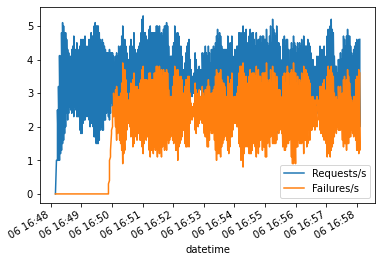

In [8]:
# Draw plot for request/s
ax1 = plt.gca()
stats_history_df.plot(x="datetime", y="Requests/s", ax=ax1)
stats_history_df.plot(x="datetime", y="Failures/s", ax=ax1)
# stats_history_df.plot(kind="scatter", x="datetime", y="Requests/s", color="red", ax=ax1)
plt.show()

In [9]:
plt.savefig('request_per_second.png', format="png")

<Figure size 432x288 with 0 Axes>

In [10]:
plt.close()

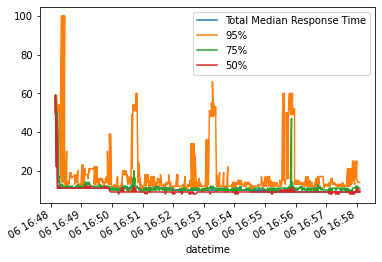

In [11]:
# draw plot for response times
ax2 = plt.gca()
stats_history_df.plot(x="datetime", y="Total Median Response Time", ax=ax2)
stats_history_df.plot(x="datetime", y="95%", ax=ax2)
stats_history_df.plot(x="datetime", y="75%", ax=ax2)
stats_history_df.plot(x="datetime", y="50%", ax=ax2)
# stats_history_df.plot(kind="scatter", x="datetime", y="Total Min Response Time", ax=ax2,color="green")
# stats_history_df.plot(kind="scatter", x="datetime", y="Total Max Response Time", ax=ax2, color="red")
plt.show()

In [12]:
plt.savefig('response_time.png', format="png")

<Figure size 432x288 with 0 Axes>

In [13]:
plt.close()

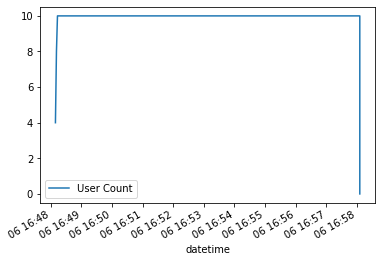

In [14]:
# draw plot for number of users simulated
ax2 = plt.gca()
stats_history_df.plot(x="datetime", y="User Count", ax=ax2)
plt.show()

In [15]:
# DataFrame display x%ile

percentile_df = stats_history_df[["50%","66%","75%","80%","90%","95%","98%","99%","99.9%","99.99%","99.999%","100%"]]
percentile_df

,50%,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,99.999%,100%
1,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
2,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0
4,22.0,22.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
5,49.0,50.0,51.0,53.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0
7,13.0,13.0,22.0,22.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
893,9.0,10.0,11.0,12.0,13.0,14.0,16.0,16.0,16.0,16.0,16.0,16.0
895,10.0,11.0,11.0,11.0,12.0,14.0,21.0,21.0,21.0,21.0,21.0,21.0
896,9.0,10.0,11.0,12.0,13.0,14.0,15.0,15.0,15.0,15.0,15.0,15.0
898,10.0,11.0,11.0,11.0,12.0,14.0,21.0,21.0,21.0,21.0,21.0,21.0


In [16]:
stats_history_df[["Requests/s", "50%","66%","75%","80%","90%","95%","98%","99%","99.9%","99.99%","99.999%","100%"]].mean()

Requests/s     3.254867
50%            9.596667
66%           10.185000
75%           11.218333
80%           11.765000
90%           14.046667
95%           18.380000
98%           24.476667
99%           24.560000
99.9%         24.560000
99.99%        24.560000
99.999%       24.560000
100%          24.560000
dtype: float64

In [17]:
stats_history_home_df = stats_history_df[stats_history_df.Name == "GetHome"]

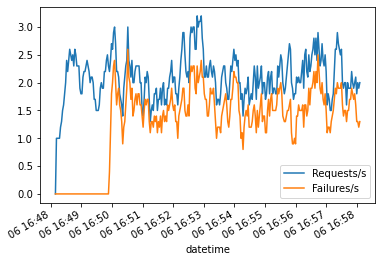

In [18]:
# Draw plot for request/s for GetHome
ax1 = plt.gca()
stats_history_home_df.plot(x="datetime", y="Requests/s", ax=ax1)
stats_history_home_df.plot(x="datetime", y="Failures/s", ax=ax1)
# stats_history_df.plot(kind="scatter", x="datetime", y="Requests/s", color="red", ax=ax1)
plt.show()